# Sprint 論文読解入門

## 1.このSprintについて

**Sprintの目的**

- 機械学習分野の論文から有益な情報を引き出せるようにする
- これまで扱ってきた領域の論文から新たな知識を得る

**どのように学ぶか**

ある論文に対しての問題に答えていくことで、読むポイントを学んでいきます。

## 2.論文読解

以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。


[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99


[https://arxiv.org/pdf/1506.01497.pdf](https://arxiv.org/pdf/1506.01497.pdf)

## 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください

### (1) 物体検出の分野にはどういった手法が存在したか。

- DPM(Deformable Part Model)

> We consider the problem of detecting and localizing objects of a generic category, such as people or cars, in static images. We have developed a new multiscale deformable part model for solving this problem. The models are trained using a discriminative procedure that only requires bounding box labels for the positive examples. Using these models we implemented a detection system that is both highly efficient and accurate, processing an image in about 2 seconds and achieving recognition rates that are significantly better than previous systems. 

> Our system also relies heavily on new methods for discriminative training. We combine a margin-sensitive approach for data mining hard negative examples with a formalism we call latent SVM. A latent SVM, like a hidden CRF, leads to a non-convex training problem. However, a latent SVM is semi-convex and the training problem becomes convex once latent information is specified for the positive examples. 

> (参照論文)[P. Felzenszwalb, D. Mcallester, and D. Ramanan, “A Discriminatively Trained , Multiscale , Deformable Part Model,” in IEEE Conference on Computer Vision and Pattern Recognition, 2008](http://people.cs.uchicago.edu/~pff/papers/latent.pdf)

- R-CNN

> Since we combine region proposals with CNNs, we call our method R-CNN: Regions with CNN features. We also compare R-CNN to OverFeat, a recently proposed sliding-window detector based on a similar CNN
architecture. We find that R-CNN outperforms OverFeat by a large margin on the 200-class ILSVRC2013 detection dataset. 


> (参照論文)[Ross Girshick, Jeff Donahue, Trevor Darrell, Jitendra Malik: Rich feature hierarchies for accurate object detection and semantic segmentation(2014)](https://arxiv.org/pdf/1311.2524.pdf)


- OverFeat

> Along with this paper, we release a feature extractor named “OverFeat” 1 in order to provide owerful features for computer vision research. Two models are provided, a fast and accurate one. Each architecture is described in tables 1 and 3. We also compare their sizes in Table 4 in terms of arameters and connections. The accurate model is more accurate than the fast one (14.18% lassification
error as opposed to 16.39% in Table 2), however it requires nearly twice as many connections. Using a committee of 7 accurate models reaches 13.6% classification error as shown in Fig. 4.

> (参照論文)[Pierre Sermanet, David Eigen, Xiang Zhang, Michael Mathieu, Rob Fergus, Yann LeCun:OverFeat:Integrated Recognition, Localization and Detection using Convolutional Networks(2014)](https://arxiv.org/pdf/1312.6229v4.pdf)

- SPPnets

> Spatial pyramid pooling networks (SPPnets) were proposed to speed up R-CNN by sharing computation. The SPPnet method computes a convolutional feature map for the entire input image and then classifies each object proposal using a feature vector extracted from the shared feature map. Features are xtracted for a proposal by maxpooling the portion of the feature map inside the proposal into a fixed-size output (e.g., 6 × 6). Multiple output sizes are pooled and then concatenated as in spatial yramid pooling. SPPnet accelerates R-CNN by 10 to 100× at test time. Training time is also reduced by 3× due to faster proposal feature extraction.

> (参照論文)[Ross Girshick: Fast R-CNN(2015)](https://arxiv.org/pdf/1504.08083.pdf)

- Fast R-CNN

> We propose a new training algorithm that fixes the disadvantages of R-CNN and SPPnet, while mproving on their speed and accuracy. We call this method Fast R-CNN because it’s comparatively fast to train and test. The Fast RCNN method has several advantages:

    1. Higher detection quality (mAP) than R-CNN, SPPnet
    2. Training is single-stage, using a multi-task loss
    3. Training can update all network layers
    4. No disk storage is required for feature caching

> (参照論文)[Ross Girshick: Fast R-CNN(2015)](https://arxiv.org/pdf/1504.08083.pdf)

- Faster R-CNN

> State-of-the-art object detection networks depend on region proposal algorithms to hypothesize object locations.Advances like SPPnet and Fast R-CNN have reduced the running time of these detection networks, exposing region proposal computation as a bottleneck. 

> In this work, we introduce a Region Proposal Network (RPN) that shares full-image convolutional features with the detection network, thus enabling nearly cost-free region proposals. 

> (参照論文)[Ren, S., He, K., Girshick, R., Sun, J.: Faster R-CNN: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015)](https://arxiv.org/pdf/1506.01497.pdf)


### (2) Fasterとあるが、どういった仕組みで高速化したのか。

全画像の畳み込みの特徴を物体検出ネットワークに共有する領域提案ネットワーク(Region Proposal Network)を提案することにより、このネットワークがほとんどコストのない領域提案を可能にすることができるという。

つまり、Faster R-CNNでは従来手法が領域提案に時間がかかることを受けて、RPNを提案することでこれまでよりも軽い計算コストで領域提案をできるようにした。

> An RPN is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. The RPN is trained end-to-end to generate high-quality region proposals, which are used by Fast R-CNN for detection. We further merge RPN and Fast R-CNN into a single network by sharing their convolutional features—using the recently popular terminology of neural networks with
“attention” mechanisms, the RPN component tells the unified network where to look. 

> In this paper, we show that an algorithmic change—computing proposals with a deep convolutional neural network—leads to an elegant and effective solution where proposal computation is nearly cost-free given the detection network’s computation. To this end, we introduce novel Region Proposal Networks (RPNs) that share convolutional layers with state-of-the-art object detection networks. By sharing convolutions at test-time, the marginal cost for computing proposals is small (e.g., 10ms per image).

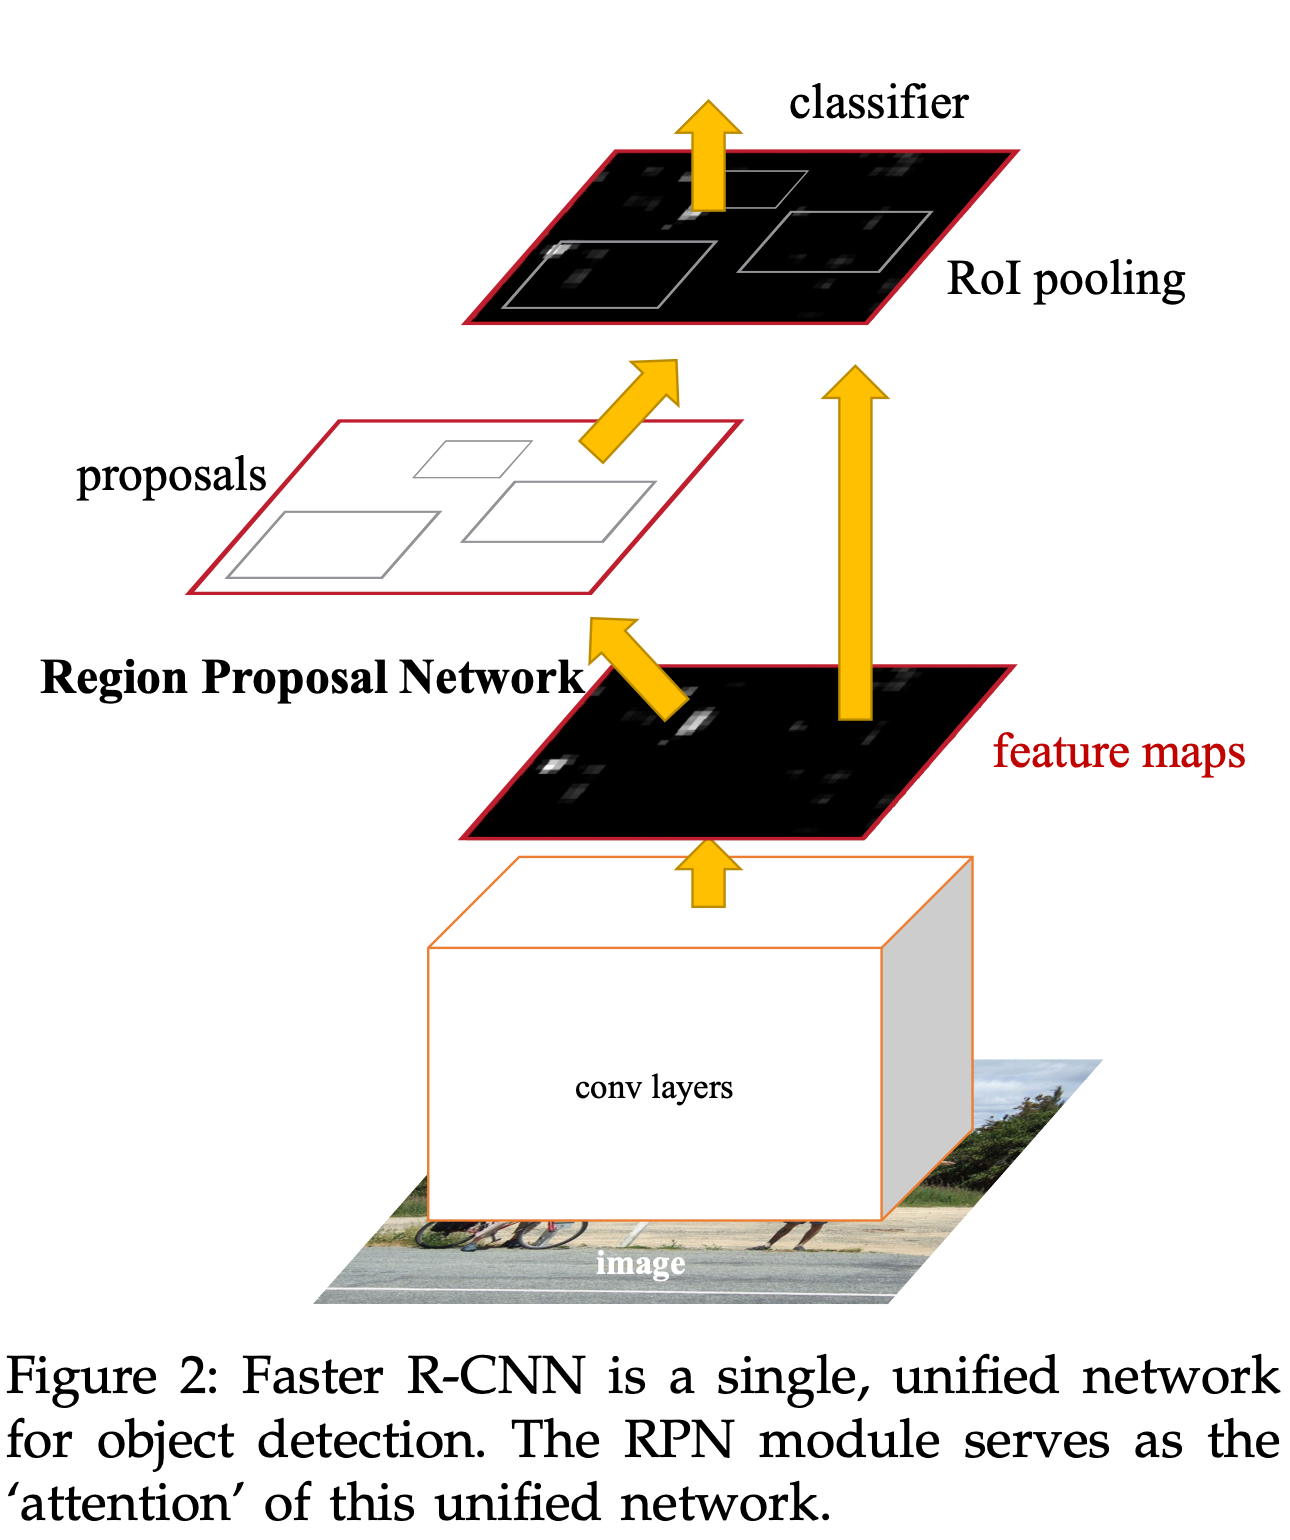

### (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。

One-Stageは画像中の物体のクラス分類と物体検出を同時に行うパイプラインであるのに対し、
Two-Stageは領域提案（RPN）と物体検出（Faster R-CNN）に分けて行われる。

> OverFeat is a one-stage, class-specific detection pipeline, and ours is a two-stage cascade consisting of class-agnostic proposals and class-specific etections. 
In OverFeat, the region-wise features come from a sliding window of one aspect ratio over a scale pyramid. These features are used to simultaneously determine the location and category of objects. In RPN, the features are from square (3×3) sliding windows and predict proposals relative to anchors with different scales and aspect ratios. Though both methods use sliding windows, the region proposal task is only the first stage of Faster RCNN—the downstream Fast R-CNN detector attends to the proposals to refine them. In the second stage of our cascade, the region-wise features are adaptively pooled, from proposal boxes that more faithfully cover the features of the regions. We believe these features lead to more accurate detections.

### (4) RPNとは何か。

Region Proposal Network(RPN): 領域提案ネットワーク。物体領域候補を選び出すニューラルネットワーク 

> An RPN is a fully convolutional network that simultaneously predicts object bounds and objectness scores at each position. The RPN is trained end-to-end to generate high-quality region proposals, which are used by Fast R-CNN for detection. We further merge RPN and Fast R-CNN into a single network by sharing their convolutional features—using the recently popular terminology of neural networks with
“attention” mechanisms, the RPN component tells the unified network where to look.

> (参照論文)[Ren, S., He, K., Girshick, R., Sun, J.: Faster R-CNN: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015)](https://arxiv.org/pdf/1506.01497.pdf)

### (5) RoIプーリングとは何か。

Region of Interest(RoI) : 物体領域（関心領域とも呼ばれる）

RoIプーリング層は、maxプーリングを用いて、有効な関心領域内の特徴を、H×W（例えば、7×7）の固定空間エクステントを持つ小さな特徴マップに変換する。つまり、入力を固定長に変換するアルゴリズムを適用し、入力特徴マップのサイズにかかわらず固定長の長さに変換するものである。

> The RoI pooling layer uses max pooling to convert the features inside any valid region of interest into a small feature map with a fixed spatial extent of H × W (e.g., 7 × 7), where H and W are layer hyper-parameters that are independent of any particular RoI. In this paper, an RoI is a rectangular window into a conv feature map. Each RoI is defined by a four-tuple (r, c, h, w) that specifies its top-left corner (r, c) and its height and width (h, w).

> RoI max pooling works by dividing the h × w RoI window into an H × W grid of sub-windows of approximate size h/H × w/W and then max-pooling the values in each sub-window into the corresponding output grid cell. Pooling is applied independently to each feature map channel, as in standard max pooling. The RoI layer is simply the special-case of the spatial pyramid pooling layer used in
SPPnets in which there is only one pyramid level. We use the pooling sub-window calculation given in.

> (参照論文)[Ross Girshick: Fast R-CNN(2015)](https://arxiv.org/pdf/1504.08083.pdf)

### (6) Anchorボックスのサイズはどうするのが適切か。

**3（基準の長さ）×3（縦横比）**

例：基準の長さ→64,128,256、縦横比→1:1, 1:2, 2:1（正方形、横長、縦長）
⇒正方形(小)、縦長長方形(小)、横長長方形(小)、正方形(中)、…、横長長方形(大)で計9つ

> By default we use 3 scales and 3 aspect ratios (69.9% mAP in Table 8). If using just one anchor at each position, the mAP drops by a considerable margin of 3-4%. The mAP is higher if using 3 scales (with 1 aspect ratio) or 3 aspect ratios (with 1 scale), demonstrating that using anchors of multiple sizes as the regression references is an effective solution. Using just 3 scales with 1 aspect ratio (69.8%) is as good as using 3 scales with 3 aspect ratios on this dataset, suggesting that scales and aspect ratios are not disentangled dimensions for the detection accuracy. But we still adopt these two dimensions in our designs to keep our system flexible.

### (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。

- PASCAL VOC 2007

>  SS has an mAP of 58.7% and EB has an mAP of 58.6% under the Fast R-CNN framework. RPN with Fast R-CNN achieves competitive results, with
an mAP of 59.9% while using up to 300 proposals. Using RPN yields a much faster detection system than using either SS or EB because of shared convolutional
computations; the fewer proposals also reduce the region-wise fully-connected layers’ cost (Table 5).

- Microsoft COCO

> Using the COCO training set to train, Faster R-CNN has 42.1% mAP@0.5 and 21.5% mAP@[.5, .95] on the COCO test-dev set. This is 2.8% higher for mAP@0.5 and 2.2% higher for mAP@[.5, .95] than the Fast RCNN counterpart under the same protocol (Table 11).
This indicates that RPN performs excellent for improving the localization accuracy at higher IoU thresholds. Using the COCO trainval set to train, Faster RCNN has 42.7% mAP@0.5 and 21.9% mAP@[.5, .95] on the COCO test-dev set.

### (8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。

- You Only Look Once: Unified, Real-Time Object Detection (2016)

> We present YOLO, a new approach to object detection.Prior work on object detection repurposes classifiers to perform detection. Instead, we frame object detection as a regression problem to spatially separated bounding boxes and associated class probabilities. A single neural network predicts bounding boxes and class probabilities directly from full images in one evaluation. Since the whole detection pipeline is a single network, it can be optimized end-to-end directly on detection performance.

> Our unified architecture is extremely fast. Our base YOLO model processes images in real-time at 45 frames per second. A smaller version of the network, Fast YOLO, processes an astounding 155 frames per second while still achieving double the mAP of other real-time detectors. Compared to state-of-the-art detection systems, YOLO makes more localization errors but is less likely to predict false positives on background. Finally, YOLO learns very general representations of objects. It outperforms other detection methods, including DPM and R-CNN, when generalizing from natural images to other domains like artwork.

> Other Fast Detectors Fast and Faster R-CNN focus on speeding up the R-CNN framework by sharing omputation and using neural networks to propose regions instead of Selective Search. While they offer speed and accuracy improvements over R-CNN, both still fall short of real-time performance.

> The recent Faster R-CNN replaces selective search with a neural network to propose bounding boxes, similar to Szegedy et al. In our tests, their most accurate model achieves 7 fps while a smaller, less accurate one runs at 18 fps. The VGG-16 version of Faster R-CNN is 10 mAP higher but is also 6 times slower than YOLO. The ZeilerFergus Faster R-CNN is only 2.5 times slower than YOLO but is also less accurate.

> (参照論文)[Joseph Redmon, Santosh Divvala, Ross Girshick, Ali Farhadi:You Only Look Once: Unified, Real-Time Object Detection (2016)](https://arxiv.org/pdf/1506.02640.pdf)

- SSD: Single Shot MultiBox Detector(2016)

> Current state-of-the-art object detection systems are variants of the following approach:hypothesize bounding boxes, resample pixels or features for each box, and apply a highquality classifier. This pipeline has prevailed on detection enchmarks since the Selective Search work through the current leading results on PASCAL VOC, COCO, and ILSVRC detection all based on Faster R-CNN albeit with deeper features such as. While accurate, these approaches have been too computationally intensive for embedded systems and, even with high-end hardware, too slow for real-time applications.
Often detection speed for these approaches is measured in seconds per frame (SPF),
and even the fastest high-accuracy detector, Faster R-CNN, operates at only 7 frames per second (FPS). There have been many attempts to build faster detectors by attacking each stage of the detection pipeline (see related work in Sec. 4), but so far, significantly increased speed comes only at the cost of significantly decreased detection accuracy.

> (参照論文)[Wei Liu, Dragomir Anguelov, Dumitru Erhan, Christian Szegedy, Scott Reed, Cheng-Yang Fu, Alexander C. Berg:SSD: Single Shot MultiBox Detector(2016)](https://arxiv.org/pdf/1512.02325.pdf)

- Objects as Points(2019)

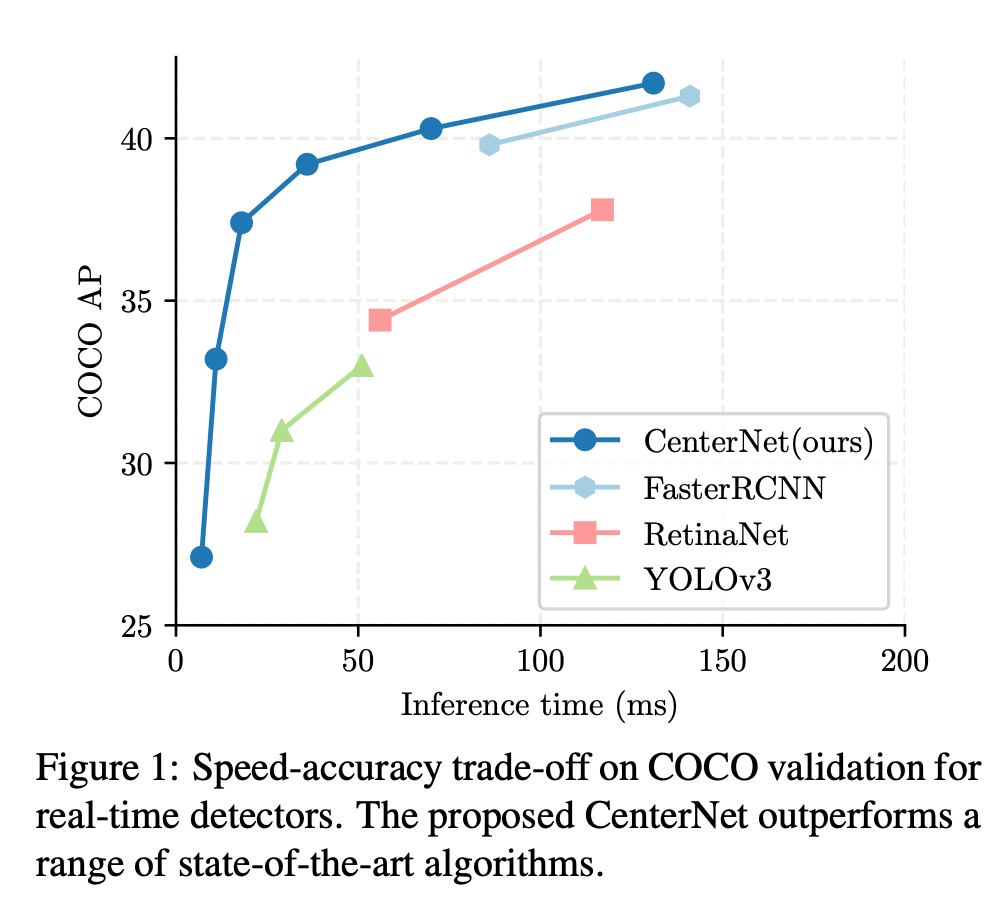

> Faster RCNN generates region proposal within the detection network. It samples fixed-shape bounding boxes (anchors) around a low-resolution image grid and classifies each into “foreground or not”. An anchor is labeled foreground with a >0.7 overlap with any ground truth object, background with a < 0.3 overlap, or ignored otherwise. Each generated region proposal is again classified. Changing the proposal classifier to a multi-class classification forms the basis of one-stage detectors. Several improvements to one-stage detectors include anchor shape
priors, different feature resolution, and loss re-weighting among different samples.

> Our approach is closely related to anchor-based onestage approaches. A center point can be seen as a single shape-agnostic anchor (see Figure 3). However,
there are a few important differences. First, our CenterNet assigns the “anchor” based solely on location, not box overlap. We have no manual thresholds for foreground and background classification. Second, we only have one positive “anchor” per object, and hence do not need NonMaximum Suppression (NMS). We simply extract local peaks in the keypoint heatmap. Third, CenterNet uses a larger output resolution (output stride of 4) compared to traditional object detectors(output stride of 16).This eliminates the need for multiple anchors.

> (参照論文)[Xingyi Zhou, Dequan Wang, Philipp Krähenbühl: Objects as Points(2019)](https://arxiv.org/pdf/1904.07850.pdf)